In [41]:
import pandas as pd
import numpy as np
comcast=pd.read_csv("Comcast_telecom_complaints_data.csv",parse_dates=['Date'])
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [43]:
comcast.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [44]:
comcast.columns


Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [45]:
comcast.rename(columns = {'Customer Complaint':'Customer_Complaint'},inplace=True)


In [46]:
comcast.columns
   

Index(['Ticket #', 'Customer_Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [47]:
comcast.head(10)

,Ticket #,Customer_Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,2015-06-12,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,2015-06-24,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No
7,359792,Comcast refuses to help troubleshoot and corre...,2015-06-23,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No
8,318072,Comcast extended outages,2015-06-01,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No
9,371214,Comcast Raising Prices and Not Being Available...,2015-06-28,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes


In [48]:

#change Date data types integer to datetime64

In [49]:
#comcast['Date'] = pd.to_datetime(comcast.Time)

In [50]:
comcast.dtypes

Ticket #                               object
Customer_Complaint                     object
Date                           datetime64[ns]
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

# create trend charts of customer complaints in monthly and daily basis

In [51]:
#trend=comcast.loc[:,['Customer_Complaint','Date']]
#trend
comcast[['Customer_Complaint','Date']].sample(5)

,Customer_Complaint,Date
582,Slow Internet,2015-06-28
600,Comcast data cap,2015-06-24
1061,comcast intrnet,2015-06-12
1482,Comcast terrible service #2,2015-05-04
1153,Comcast internet Dropping out,2015-06-24


In [52]:
#trend.groupby([trend['Date'].dt.month.rename('month'), trend['Date'].dt.day.rename('day')]).agg({'count'})

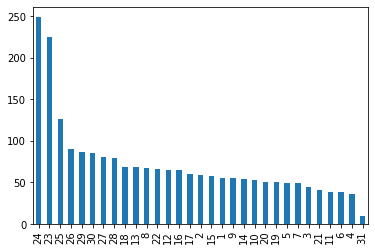

In [53]:
#trend['Date'].groupby(trend.Date.dt.day).agg('count')
comcast.Date.dt.day.value_counts().plot(kind='bar')

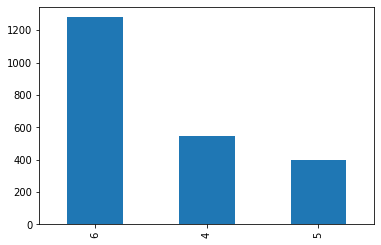

In [54]:
#trend['Date'].groupby(trend.Date.dt.month).agg('count')
comcast.Date.dt.month.value_counts().plot(kind='bar')

In [55]:
#import matplotlib.pyplot
#trend['Date'].groupby(trend.Date.dt.day).agg('count').plot(kind='bar',figsize=(15, 10),legend=True)

In [56]:
#trend['Date'].groupby(trend.Date.dt.month).agg('count').plot(kind='bar',figsize=(15,10),legend=True)

In [57]:
#frequency of complaint types

In [58]:
freq_comp=comcast.loc[:,['Customer_Complaint']]

In [59]:
freq_comp

,Customer_Complaint
0,Comcast Cable Internet Speeds
1,Payment disappear - service got disconnected
2,Speed and Service
3,Comcast Imposed a New Usage Cap of 300GB that ...
4,Comcast not working and no service to boot
...,...
2219,Service Availability
2220,Comcast Monthly Billing for Returned Modem
2221,complaint about comcast
2222,Extremely unsatisfied Comcast customer


In [60]:
#Provide a table with the frequency of complaint types.-  
freq_comp['Customer_Complaint'].value_counts()

Comcast                                                    83
Comcast Internet                                           18
Comcast Data Cap                                           17
comcast                                                    13
Data Caps                                                  11
                                                           ..
Not receiving advertised speed                              1
Comcast refuse to honor agreed upon price / promotion       1
Re: Unfair Billing Practices Complaints against Comcast     1
Installation Charges                                        1
Terrible customer service and process                       1
Name: Customer_Complaint, Length: 1841, dtype: int64

In [61]:
#•	Which complaint types are maximum i.e., around internet, network issues, or across any other domains
#which complaint has maximum
freq_comp['Customer_Complaint'].value_counts().idxmax()

'Comcast'

In [62]:
#Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
#- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:- 


In [63]:
#create categorical variable
comcast_cat=comcast.loc[:,['Customer_Complaint','State','Status']]
comcast_cat

,Customer_Complaint,State,Status
0,Comcast Cable Internet Speeds,Maryland,Closed
1,Payment disappear - service got disconnected,Georgia,Closed
2,Speed and Service,Georgia,Closed
3,Comcast Imposed a New Usage Cap of 300GB that ...,Georgia,Open
4,Comcast not working and no service to boot,Georgia,Solved
...,...,...,...
2219,Service Availability,Florida,Closed
2220,Comcast Monthly Billing for Returned Modem,Michigan,Solved
2221,complaint about comcast,Michigan,Solved
2222,Extremely unsatisfied Comcast customer,Michigan,Solved


In [64]:
#change the data types of Status 
#change object to category
comcast_cat["Status"] = comcast_cat["Status"].astype('category')


In [65]:
comcast_cat.dtypes

Customer_Complaint      object
State                   object
Status                category
dtype: object

In [66]:
#creating categorical variable
comcast_cat['Status_cat']=comcast_cat.Status.map({'Closed':0,'Open':1,'Pending':0,'Solved':0})

In [67]:
comcast_cat

,Customer_Complaint,State,Status,Status_cat
0,Comcast Cable Internet Speeds,Maryland,Closed,0
1,Payment disappear - service got disconnected,Georgia,Closed,0
2,Speed and Service,Georgia,Closed,0
3,Comcast Imposed a New Usage Cap of 300GB that ...,Georgia,Open,1
4,Comcast not working and no service to boot,Georgia,Solved,0
...,...,...,...,...
2219,Service Availability,Florida,Closed,0
2220,Comcast Monthly Billing for Returned Modem,Michigan,Solved,0
2221,complaint about comcast,Michigan,Solved,0
2222,Extremely unsatisfied Comcast customer,Michigan,Solved,0


In [68]:
#Provide state wise status of complaints in a stacked bar chart. Use the categorized variable

In [69]:
stacked_bar=comcast_cat.loc[:,['State','Status_cat']]
stacked_bar

,State,Status_cat
0,Maryland,0
1,Georgia,0
2,Georgia,0
3,Georgia,1
4,Georgia,0
...,...,...
2219,Florida,0
2220,Michigan,0
2221,Michigan,0
2222,Michigan,0


In [70]:
#which state has maximum complaints


In [71]:
comcast.head()

,Ticket #,Customer_Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [72]:
comcast_comp=comcast.loc[:,['Customer_Complaint','State']]
comcast_comp.head()

,Customer_Complaint,State
0,Comcast Cable Internet Speeds,Maryland
1,Payment disappear - service got disconnected,Georgia
2,Speed and Service,Georgia
3,Comcast Imposed a New Usage Cap of 300GB that ...,Georgia
4,Comcast not working and no service to boot,Georgia


In [73]:
comcast_comp.groupby('State').Customer_Complaint.count()

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina

In [34]:
comcast_comp.groupby('State').Customer_Complaint.count().idxmax()

'Georgia'

In [35]:
 
stacked_bar

,State,Status_cat
0,Maryland,0
1,Georgia,0
2,Georgia,0
3,Georgia,1
4,Georgia,0
...,...,...
2219,Florida,0
2220,Michigan,0
2221,Michigan,0
2222,Michigan,0


In [36]:
#stacked_bar.groupby('Status_cat').State.count() .plot(kind='bar',stacked=True)
#groups=stacked_bar.groupby(['State','Status_cat'])
#for x,y in groups:
 #   print(x)
  #  print(y)

In [37]:
#stacked_bar.pivot_table(index='State',aggfunc='count')



In [38]:
 #•	Which state has the highest percentage of unresolved complaints- 
stacked_bar.groupby('State').Status_cat.mean().idxmax()

'Maine'

In [39]:
#Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:-


In [40]:
stacked_bar[stacked_bar['Status_cat']==1] ['State'].value_counts()

California              47
Florida                 35
Georgia                 35
Tennessee               33
Illinois                23
Michigan                18
Washington              18
Texas                   18
New Jersey              17
Pennsylvania            14
Maryland                13
Colorado                12
Massachusetts           10
Oregon                  10
Mississippi              9
Virginia                 8
Indiana                  8
Utah                     6
Alabama                  4
West Virginia            3
New Hampshire            3
New Mexico               3
Delaware                 3
Minnesota                2
South Carolina           2
Arizona                  2
Maine                    2
Connecticut              2
District Of Columbia     1
Missouri                 1
Vermont                  1
Name: State, dtype: int64